### Data load & Preprocessing

In [1]:
import pandas as pd

train_df = pd.read_csv('./train.csv') 
test_df = pd.read_csv('./test.csv')
build_df = pd.read_csv('./building_info.csv')

print(train_df.head())
print('\n')
print(test_df.head())
print('\n')
print(build_df.head())

   num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20220601 00     1  20220601 00   18.6      NaN      0.9   42.0     NaN   
1  1_20220601 01     1  20220601 01   18.0      NaN      1.1   45.0     NaN   
2  1_20220601 02     1  20220601 02   17.7      NaN      1.5   45.0     NaN   
3  1_20220601 03     1  20220601 03   16.7      NaN      1.4   48.0     NaN   
4  1_20220601 04     1  20220601 04   18.4      NaN      2.8   43.0     NaN   

   일사(MJ/m2)  전력소비량(kWh)  
0        NaN     1085.28  
1        NaN     1047.36  
2        NaN      974.88  
3        NaN      953.76  
4        NaN      986.40  


   num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)
0  1_20220825 00     1  20220825 00   23.5      0.0      2.2     72
1  1_20220825 01     1  20220825 01   23.0      0.0      0.9     72
2  1_20220825 02     1  20220825 02   22.7      0.0      1.5     75
3  1_20220825 03     1  20220825 03   22.1      0.0      1.3     78
4  1_20220825 04     

In [2]:
print(train_df.columns)
print(test_df.columns)
print(build_df.columns)

Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)'],
      dtype='object')
Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)'], dtype='object')
Index(['건물번호', '건물유형', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)', 'ESS저장용량(kWh)',
       'PCS용량(kW)'],
      dtype='object')


In [3]:
# train_df.drop(columns = ['num_date_time'],inplace = True)
# test_df.drop(columns = ['num_date_time'],inplace = True)
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [4]:
train_df.columns = ['num_date_time', 'build_num','datetime','temperature','precipitation','wind_speed',
                    'humidity','sunlight','solar_power','electric_power_cousumption']
test_df.columns = ['num_date_time', 'build_num','datetime','temperature','precipitation','wind_speed',
                   'humidity']

build_df.columns = ['build_num','build_type','gross_area','cooling_area',
                    'solar_capacity','ess_capacity','pcs_capacity']

In [5]:
train_df['year'] = pd.to_numeric(train_df['datetime'].str.slice(0,4))
train_df['month'] = pd.to_numeric(train_df['datetime'].str.slice(4,6))
train_df['day'] = pd.to_numeric(train_df['datetime'].str.slice(6,8))
train_df['day'] = pd.to_numeric(train_df['datetime'].str.slice(9,11))

test_df['year'] = pd.to_numeric(test_df['datetime'].str.slice(0,4))
test_df['month'] = pd.to_numeric(test_df['datetime'].str.slice(4,6))
test_df['day'] = pd.to_numeric(test_df['datetime'].str.slice(6,8))
test_df['day'] = pd.to_numeric(test_df['datetime'].str.slice(9,11))

train_df.drop(columns = ['datetime'],inplace = True)
test_df.drop(columns = ['datetime'],inplace = True)

train_df.head()

,num_date_time,build_num,temperature,precipitation,wind_speed,humidity,sunlight,solar_power,electric_power_cousumption,year,month,day
0,1_20220601 00,1,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,2022,6,0
1,1_20220601 01,1,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,2022,6,1
2,1_20220601 02,1,17.7,NaN,1.5,45.0,NaN,NaN,974.88,2022,6,2
3,1_20220601 03,1,16.7,NaN,1.4,48.0,NaN,NaN,953.76,2022,6,3
4,1_20220601 04,1,18.4,NaN,2.8,43.0,NaN,NaN,986.40,2022,6,4


In [6]:
# Null 값 확인
train_df.isnull().sum()

num_date_time                      0
build_num                          0
temperature                        0
precipitation                 160069
wind_speed                        19
humidity                           9
sunlight                       75182
solar_power                    87913
electric_power_cousumption         0
year                               0
month                              0
day                                0
dtype: int64

In [7]:
# Null 값 제거
train_df.fillna(0, inplace=True)
train_df.isnull().sum()

num_date_time                 0
build_num                     0
temperature                   0
precipitation                 0
wind_speed                    0
humidity                      0
sunlight                      0
solar_power                   0
electric_power_cousumption    0
year                          0
month                         0
day                           0
dtype: int64

In [8]:
kor_type = build_df['build_type'].unique()
print(kor_type)

type_list = ['etc','public','university','data_center','department_store','hospital',
             'commercial','aptartment','lab','knowledge_industry_complex','mart','hotel']
for i in range(len(kor_type)):
    idx = build_df[build_df['build_type'] == kor_type[i]].index
    build_df['build_type'].iloc[idx] = type_list[i]
    
build_df

['건물기타' '공공' '대학교' '데이터센터' '백화점및아울렛' '병원' '상용' '아파트' '연구소' '지식산업센터' '할인마트'
 '호텔및리조트']


/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,build_num,build_type,gross_area,cooling_area,solar_capacity,ess_capacity,pcs_capacity
0,1,etc,110634.00,39570.00,-,-,-
1,2,etc,122233.47,99000.00,-,-,-
2,3,etc,171243.00,113950.00,40,-,-
3,4,etc,74312.98,34419.62,60,-,-
4,5,etc,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,hotel,93314.00,60500.00,-,-,-
96,97,hotel,55144.67,25880.00,-,-,-
97,98,hotel,53578.62,17373.75,-,-,-
98,99,hotel,53499.00,40636.00,-,-,-


In [9]:
# '-' = 태양광, ess, pcs 관련 시설 설치x => 0처리 (날리면 안됨)
tmp = build_df['solar_capacity'][0]
build_df['solar_capacity'].replace(tmp,0,inplace = True)
build_df['ess_capacity'].replace(tmp,0,inplace = True)
build_df['pcs_capacity'].replace(tmp,0,inplace = True)
build_df = build_df.astype(
    {
        'solar_capacity' : 'float64',
        'ess_capacity' : 'float64',
        'pcs_capacity' : 'float64'
    }
)

In [10]:
# 건물 정보와 시공간 정보 결합
train_df = pd.merge(train_df,build_df)
test_df = pd.merge(test_df,build_df)

In [11]:
train_df = pd.get_dummies(data = train_df, columns =['build_type'], dtype=float)
test_df = pd.get_dummies(data = test_df, columns =['build_type'], dtype=float)

train_df.head()

,num_date_time,build_num,temperature,precipitation,wind_speed,humidity,sunlight,solar_power,electric_power_cousumption,year,...,build_type_data_center,build_type_department_store,build_type_etc,build_type_hospital,build_type_hotel,build_type_knowledge_industry_complex,build_type_lab,build_type_mart,build_type_public,build_type_university
0,1_20220601 00,1,18.6,0.0,0.9,42.0,0.0,0.0,1085.28,2022,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1_20220601 01,1,18.0,0.0,1.1,45.0,0.0,0.0,1047.36,2022,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1_20220601 02,1,17.7,0.0,1.5,45.0,0.0,0.0,974.88,2022,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1_20220601 03,1,16.7,0.0,1.4,48.0,0.0,0.0,953.76,2022,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1_20220601 04,1,18.4,0.0,2.8,43.0,0.0,0.0,986.40,2022,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# LightGBM

In [12]:
%pip install lightgbm
!brew install libomp

import os
os.environ["DYLD_LIBRARY_PATH"] = "/usr/local/opt/libomp/lib:$DYLD_LIBRARY_PATH"

Note: you may need to restart the kernel to use updated packages.
To reinstall 16.0.6, run:
  brew reinstall libomp


In [13]:
train_df.dtypes

num_date_time                             object
build_num                                  int64
temperature                              float64
precipitation                            float64
wind_speed                               float64
humidity                                 float64
sunlight                                 float64
solar_power                              float64
electric_power_cousumption               float64
year                                       int64
month                                      int64
day                                        int64
gross_area                               float64
cooling_area                             float64
solar_capacity                           float64
ess_capacity                             float64
pcs_capacity                             float64
build_type_aptartment                    float64
build_type_commercial                    float64
build_type_data_center                   float64
build_type_departmen

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 163200, number of used features: 24
[LightGBM] [Info] Start training from score 2454.932410
Mean squared error:  206646.23485260413
R2 score:  0.9640631148137265


<AxesSubplot:xlabel='label', ylabel='predict'>

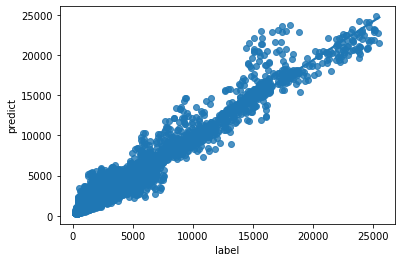

In [15]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import lightgbm as lgb
import seaborn as sns

y = train_df['electric_power_cousumption']
X = train_df.drop(
    [
        'num_date_time',
        'sunlight',
        'solar_power',
        'electric_power_cousumption'
    ], 
    axis=1
)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=156)

train_ds = lgb.Dataset(X_train, label = y_train) 
test_ds = lgb.Dataset(X_valid, label = y_valid) 

params = {
    'learning_rate': 0.01, 
    'max_depth': 16, 
    'boosting': 'gbdt', 
    'objective': 'regression', 
    'metric': 'mse', 
    'is_training_metric': True, 
    'num_leaves': 144, 
    'feature_fraction': 0.9, 
    'bagging_fraction': 0.7, 
    'bagging_freq': 5, 
    'seed':2023
}

model = lgb.train(params, train_ds, 1000, test_ds)

predict_train = model.predict(X_train)
predict_test = model.predict(X_valid)

mse = mean_squared_error(y_valid, predict_test)
r2 = r2_score(y_valid, predict_test)


# 에러 확인
print('Mean squared error: ', mse)
print('R2 score: ', r2)

final_result = pd.concat(
    [y_valid.reset_index(drop=True), pd.DataFrame(predict_test)], 
    axis = 1
)

# fit 결과 확인
final_result.columns = ['label','predict']
sns.regplot(x = 'label', y = 'predict', data = final_result)

In [16]:
test_df.head()

,num_date_time,build_num,temperature,precipitation,wind_speed,humidity,year,month,day,gross_area,...,build_type_data_center,build_type_department_store,build_type_etc,build_type_hospital,build_type_hotel,build_type_knowledge_industry_complex,build_type_lab,build_type_mart,build_type_public,build_type_university
0,1_20220825 00,1,23.5,0.0,2.2,72,2022,8,0,110634.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1_20220825 01,1,23.0,0.0,0.9,72,2022,8,1,110634.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1_20220825 02,1,22.7,0.0,1.5,75,2022,8,2,110634.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1_20220825 03,1,22.1,0.0,1.3,78,2022,8,3,110634.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1_20220825 04,1,21.8,0.0,1.0,77,2022,8,4,110634.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# 테스트 데이터에 대한 예측 수행
test_X = test_df.drop('num_date_time', axis=1)
test_pred = model.predict(test_X, num_iteration=model.best_iteration)

# 결과 저장
submission = pd.DataFrame({'num_date_time': test_df['num_date_time'], 'answer': test_pred})
submission.to_csv('submission.csv', index=False)